<a href="https://colab.research.google.com/github/akshay777-aar/Unsupervised-Learning-ML-/blob/main/Unsupervised_learning_force2020_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving force2020_data.csv to force2020_data.csv


In [3]:
data = pd.read_csv('force2020_data.csv')
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [4]:
data.shape

(18270, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [6]:
len(data)

18270

In [7]:
null = data.isnull().sum()
null

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [8]:
# To get the percentage of null value

null_percent = (null/len(data))*100
null_percent

RHOB         0.000000
GR           0.000000
DEPTH_MD     0.000000
NPHI        23.196497
PEF         10.016420
DTC          0.443350
dtype: float64

In [9]:
null_percent.round(3)

RHOB         0.000
GR           0.000
DEPTH_MD     0.000
NPHI        23.196
PEF         10.016
DTC          0.443
dtype: float64

In [10]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [11]:
nphi_med = data['NPHI'].median()
nphi_med

0.4485269189

In [12]:
# Filling null values with median

columns_to_fill = ['NPHI','PEF','DTC']
for col in columns_to_fill:
    data[col].fillna(data[col].median(), inplace=True)

# OR
# data['NPHI'].fillna(nphi_med, inplace=True)
# data['PEF'].fillna(nphi_med, inplace=True)
# data['DTC'].fillna(nphi_med, inplace=True)

In [13]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,0.448527,20.915468,161.131180
1,1.889794,79.262886,494.680,0.448527,19.383013,160.603470
2,1.896523,74.821999,494.832,0.448527,22.591518,160.173615
3,1.891913,72.878922,494.984,0.448527,32.191910,160.149429
4,1.880034,71.729141,495.136,0.448527,38.495632,160.128342


In [14]:
data.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000
mean,2.110451,63.847477,1883.228478,0.414749,3.396380,125.177975
std,0.297725,28.636331,801.941195,0.118486,2.437978,30.569325
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.344193,2.355565,90.948286
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.491632,4.046910,148.012402
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


**Standardize data**

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [16]:
# To keep it in the DataFrame format after scaling

data[['RHOB_S','NPHI_S']] = ss.fit_transform(data[['RHOB','NPHI']])
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_S,NPHI_S
0,1.884186,80.200851,494.528,0.448527,20.915468,161.131180,-0.759999,0.285088
1,1.889794,79.262886,494.680,0.448527,19.383013,160.603470,-0.741163,0.285088
2,1.896523,74.821999,494.832,0.448527,22.591518,160.173615,-0.718560,0.285088
3,1.891913,72.878922,494.984,0.448527,32.191910,160.149429,-0.734045,0.285088
4,1.880034,71.729141,495.136,0.448527,38.495632,160.128342,-0.773944,0.285088


In [17]:
data['RHOB_S'].max()

2.7456831393830528

In [18]:
data['RHOB_S'].min()

-2.3709570582296124

In [19]:
data['RHOB_S'].mean()

7.467115778102859e-17

In [20]:
data['RHOB_S'].mean().round(3)

0.0

**Applying KMeans Cluster**

In [21]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

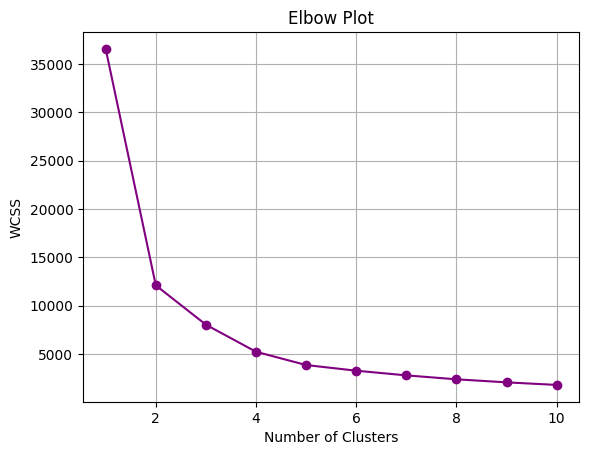

In [22]:
# Getting optimum number of clusters

def optimum_kmeans(features, max_i):
  num_k = []
  wcss = []

  for i in range(1, max_i):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(features)

    num_k.append(i)
    wcss.append(kmeans.inertia_)

  # Plotting Elbow

  fig = plt.plot(figsize=(10,5))
  plt.plot(num_k, wcss, marker='o', color='purple')
  plt.grid(True)
  plt.title('Elbow Plot')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.show()


optimum_kmeans(data[['RHOB_S','NPHI_S']], 11)


# TO VISUALIZE PLOTS ONE-BY-ONE, PUT 'PLT' STEPS INSIDE 'FOR' LOOP (here, we get 10 plots)

# def optimum_kmeans(features, max_i):
#   num_k = []
#   wcss = []

#   for i in range(1, max_i):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(features)

#     num_k.append(i)
#     wcss.append(kmeans.inertia_)


#     fig = plt.subplots(figsize=(10,5))
#     plt.plot(num_k, wcss, marker='o')
#     plt.grid(True)
#     plt.title('Elbow Plot')
#     plt.xlabel('Number of Clusters')
#     plt.ylabel('WCSS')
#     plt.show()


# optimum_kmeans(data[['RHOB_S','NPHI_S']], 11)

In [23]:
# Let no. of clusters = 4

In [24]:
# Fitting the data

kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(data[['RHOB_S','NPHI_S']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [25]:
# Adding clusters to data

data['Cluster'] = kmeans.labels_
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_S,NPHI_S,Cluster
0,1.884186,80.200851,494.528,0.448527,20.915468,161.131180,-0.759999,0.285088,1
1,1.889794,79.262886,494.680,0.448527,19.383013,160.603470,-0.741163,0.285088,1
2,1.896523,74.821999,494.832,0.448527,22.591518,160.173615,-0.718560,0.285088,1
3,1.891913,72.878922,494.984,0.448527,32.191910,160.149429,-0.734045,0.285088,1
4,1.880034,71.729141,495.136,0.448527,38.495632,160.128342,-0.773944,0.285088,1


In [26]:
data['Cluster'].value_counts()

Cluster
1    10451
0     3983
3     1958
2     1878
Name: count, dtype: int64

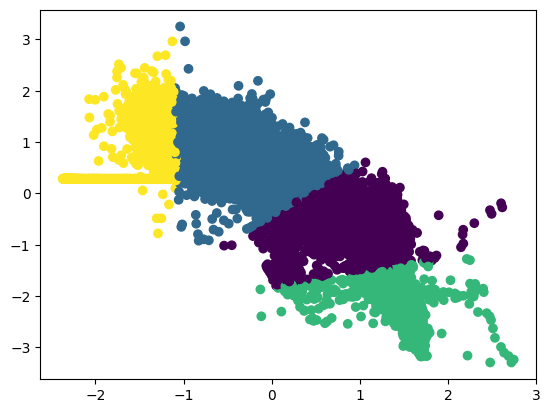

In [27]:
# Visualizing the clusters

plt.scatter(data['RHOB_S'], data['NPHI_S'], c=data['Cluster'])

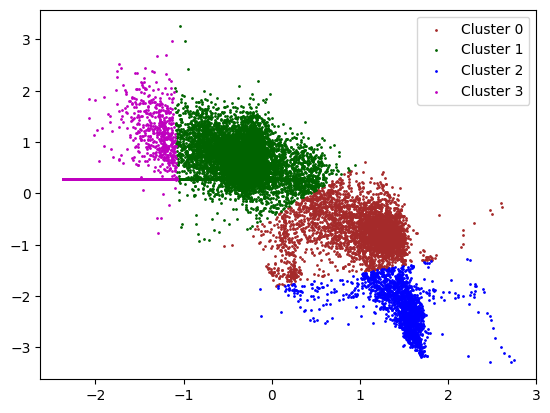

In [28]:
colors = ['#A52A2A','#006400','b','m']

for i in range(4):
  cluster_data = data[data['Cluster'] == i]
  plt.scatter(cluster_data['RHOB_S'], cluster_data['NPHI_S'], c=colors[i], label=f'Cluster {i}', s=1)
  plt.legend()

In [29]:
# Fuction to predict data

def predict_cluster(features, scalar, model):

  # trasform the new data to the scaled data
  new_data_sc = scalar.transform(features)

  # predict the new model using KMeans
  clusters = model.predict(new_data_sc)

  return clusters[0]

In [30]:
data.tail()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_S,NPHI_S,Cluster
18265,2.630211,19.418915,3271.416,0.187811,2.790249,141.300461,1.745819,-1.915360,2
18266,2.643114,21.444370,3271.568,0.185574,2.790249,141.300461,1.789158,-1.934234,2
18267,2.681300,22.646879,3271.720,0.176074,2.790249,141.300461,1.917421,-2.014420,2
18268,2.738337,22.253584,3271.872,0.174617,2.790249,141.300461,2.109002,-2.026713,2
18269,2.792922,19.829920,3272.024,0.176627,2.790249,141.300461,2.292346,-2.009754,2


In [31]:
feature1 = float(input("Enter RHOB: "))
feature2 = float(input("Enter NPHI: "))

pred_cluster = predict_cluster([[feature1,feature2]], ss, kmeans)
print(f'The predicted cluster is {pred_cluster}')

Enter RHOB: 2.63
Enter NPHI: 0.18
The predicted cluster is 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [32]:
# Silhoutte score

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(data[['RHOB_S','NPHI_S']], data['Cluster'])
print(f'The Silhoutte score is {sil_score.round(2)}')

The Silhoutte score is 0.56


**To view more clusters**

In [33]:
X = data[['RHOB_S','NPHI_S']]
for i in range(1,7):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  data[f'Cluster_{i}'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [34]:
data.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_S,NPHI_S,Cluster,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6
0,1.884186,80.200851,494.528,0.448527,20.915468,161.131180,-0.759999,0.285088,1,0,1,1,3,3,0
1,1.889794,79.262886,494.680,0.448527,19.383013,160.603470,-0.741163,0.285088,1,0,1,1,3,3,0
2,1.896523,74.821999,494.832,0.448527,22.591518,160.173615,-0.718560,0.285088,1,0,1,1,3,3,0
3,1.891913,72.878922,494.984,0.448527,32.191910,160.149429,-0.734045,0.285088,1,0,1,1,3,3,0
4,1.880034,71.729141,495.136,0.448527,38.495632,160.128342,-0.773944,0.285088,1,0,1,1,3,3,0


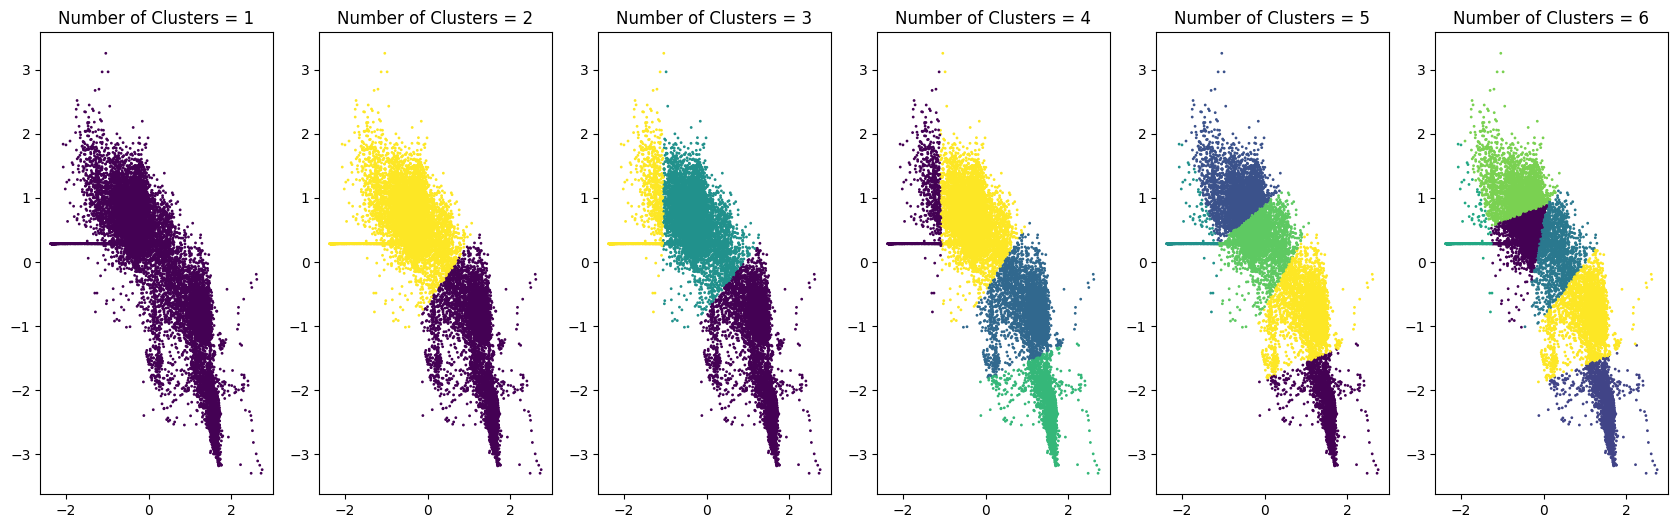

In [35]:
a,b = plt.subplots(nrows=1, ncols=6, figsize=(21,6))

for i,b in enumerate(a.axes, start = 1):
  b.scatter(x = data['RHOB_S'], y = data['NPHI_S'], c = data[f'Cluster_{i}'], s=1)
  b.set_title(f'Number of Clusters = {i}')

**Applying Hierarchal Clustering**

In [36]:
x1 = data[['RHOB_S','NPHI_S']]

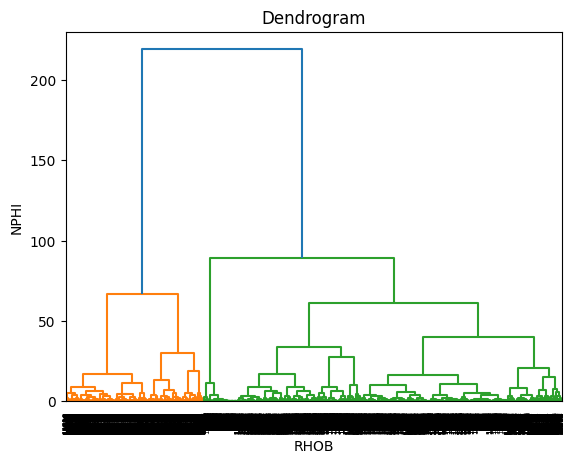

In [37]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.show()